## Repaso bibliotecas Numpy, Pandas, Matplotlib y Seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2><font color="blue">Ejercicio 1</font></h2>

Cree una distribución uniforme y una distribución gaussiana univariadas y grafíquelas usando histogramas.

Text(0, 0.5, 'Frecuencia')

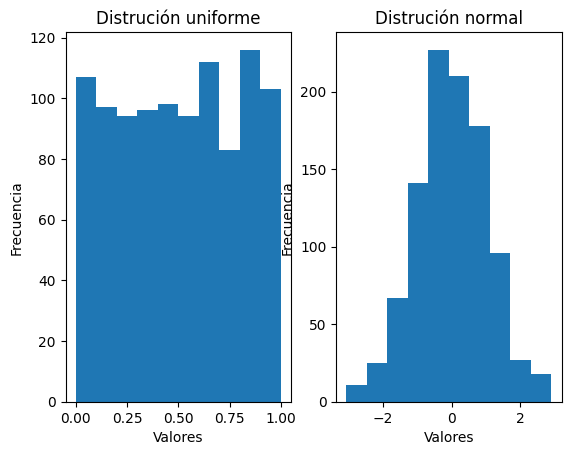

In [3]:
#Distribución uniforme
dist_uni = np.random.uniform(0,1,1000)
plt.subplot(1,2,1)
plt.hist(dist_uni)
plt.title("Distrución uniforme")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
#Distribución normal
plt.subplot(1,2,2)
dist_norm = np.random.normal(0,1,1000)
plt.hist(dist_norm)
plt.title("Distrución normal")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")


<h2><font color="blue">Ejercicio 2</font></h2>

Cargue los datos del archivo "datos.csv" de la carpeta `data`, analice los valores de la columna dataset para separar los datos en 4 grupos y grafíquelos usando scatterplot y subplots.

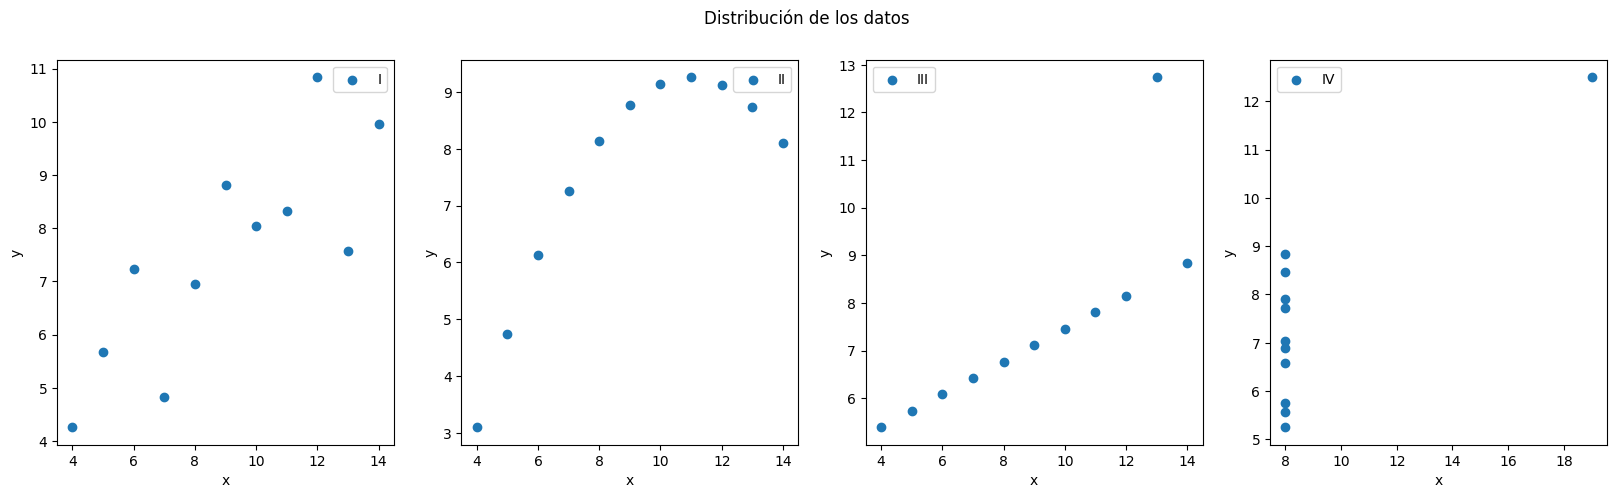

In [4]:
#Carga de datos del archivo "datos.csv" csv de la carpeta data
data = pd.read_csv('../Tema_0-Introduccion/data/datos.csv', sep=',')
#Analisis de los datos
data.head()
#Separo en grupos los datos
grupos = {}
for grupo in data['dataset'].unique():
    grupos[grupo] = data[data['dataset'] == grupo]
#Crear subplots para cada grupo
fig, axes = plt.subplots(1, len(grupos), figsize=(20, 5))
fig.suptitle('Distribución de los datos')
#Graficar los datos de cada grupoen su respectivo subplot
for i, (grupo,data) in enumerate(grupos.items()):
    ax = axes[i]
    ax.scatter(data['x'], data['y'], label=f'{grupo}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
plt.show()


<h2><font color="blue">Ejercicio 3</font></h2>

Escriba el código para generar dos matrices $\mathbf{M_1}$ y $\mathbf{M_2}$, de tamaño $[N\times M]$. Luego, reemplace los valores de $\mathbf{M_1}$ que sean mayores a los correspondientes de $\mathbf{M_2}$ (es decir, para cada posición de la matriz) por el valor $0$. Concatene este resultado a $\mathbf{M_2}$ para obtener una matriz $[2N\times M]$. Verifique el funcionamiento del código con algunos ejemplos, mostrando por pantalla la matriz resultante y su dimensión.
    
Ejemplo: si $\mathbf{M_1}=\begin{bmatrix}1 & 5 & 5\\ 5 & 8 & 7\end{bmatrix}$ y $\mathbf{M_2}=\begin{bmatrix}1 & 2 & 4\\ 5 & 6 & 7\end{bmatrix}$, la salida deberá ser $\mathbf{R}=\begin{bmatrix}1 & 0 & 0\\ 5 & 0 & 7\\1 & 2 & 4\\ 5 & 6 & 7\end{bmatrix}$  

In [17]:
#Generar dos matrices de NxM con valores random entre 1 y 100
#M1 = np.random.randint(1,100,(2,3))
#M2 = np.random.randint(1,100,(2,3))
M1 = np.array([[1,5,5],[5,8,7]])
M2 = np.array([[1,2,4],[5,6,7]])
#Reemplazar los valores de M1 que sean mayores a los de M2 por 0
M1[M1>M2] = 0
#Concatenar las matrices M1 y M2.
M3 = np.concatenate((M1,M2))
print(M3)
#print(M3.reshape(4,3))

[[1 0 0]
 [5 0 7]
 [1 2 4]
 [5 6 7]]


<h2><font color="blue">Ejercicio 4</font></h2>

Cargue los datos contenidos en el archivo "data_corrupted.csv" a un dataframe. Como el nombre lo indica, algunos datos pueden estar corruptos. Renombre las columnas del dataframe para que tengan los nombres "col1" y "col2". Encuentre el valor medio y desvío estándar de cada columna. Corrobore los resultados usando el método `describe`.

In [19]:
#CArgar datos del archivo "data_corrupted.csv" a un dataframe
df = pd.read_csv("../Tema_0-Introduccion/data/data_corrupted.csv", sep=",",header = None)
#renombrar columnas para que tenga el nombre col1 y col2
df.columns = ["col1", "col2"]
df = df.dropna() #eliminar filas con valores nulos
#encontrar el valor medio y desvío estandar de cada columna
print("Valor medio de col1: ", df["col1"].mean())
print("Valor medio de col2: ", df["col2"].mean())
print("Desvío estandar de col1: ", df["col1"].std())
print("Desvío estandar de col2: ", df["col2"].std())
#Método describe
print(df.describe())


Valor medio de col1:  0.6012486756071584
Valor medio de col2:  0.6008657517507853
Desvío estandar de col1:  0.3623088439409391
Desvío estandar de col2:  0.30176775731216143
           col1      col2
count  6.000000  6.000000
mean   0.601249  0.600866
std    0.362309  0.301768
min    0.197682  0.130571
25%    0.278116  0.426870
50%    0.621564  0.680562
75%    0.909436  0.820996
max    0.997657  0.903386


<h2><font color="blue">Ejercicio 5</font></h2>

Los archivos **iris-setosa.csv**, **iris-versicolor.csv** e **iris-virginica.csv** contienen la información del conjunto de datos <font face="Courier" size=3><b>iris</b></font> separados por clases (ver descripción en el archivo **iris.rst**).
    
1. Construya el conjunto de datos iris a partir de estos tres archivos.
Luego, reemplace en la columna <font face="Courier" size=3><b>class</b></font> los valores numéricos por el nombre correspondiente a la clase. Guarde el conjunto de datos en un único archivo CSV "iris.csv", incorporando estas modificaciones.


In [7]:
#Carga de archivos csv
df_setosa = pd.read_csv('../Tema_0-Introduccion/data/iris-setosa.csv')
df_versicolor = pd.read_csv('../Tema_0-Introduccion/data/iris-versicolor.csv')
df_virginica = pd.read_csv('../Tema_0-Introduccion/data/iris-virginica.csv')
#asignar el nombre correspondiente a la clase
df_setosa['class'] = 'setosa'
df_versicolor['class'] = 'versicolor'
df_virginica['class'] = 'virginica'
#combinar los 3 dataframes en uno solo
df = pd.concat([df_setosa, df_versicolor, df_virginica], ignore_index=True)
#Guardar el dataframe en un archivo csv
df.to_csv('../Tema_0-Introduccion/data/iris.csv', index=False)


2. Obtenga la media y desvio de cada atributo y compárelos con las mostradas en el archivo **iris.rst**, cree un dataframe de 2 columnas con estos datos

In [8]:
df = pd.read_csv('../Tema_0-Introduccion/data/iris.csv')
media = df.mean(numeric_only=True)
std = df.std(numeric_only=True)
df_resultado = pd.DataFrame({'Media': media, 'Desviación estándar': std})
df_resultado

,Media,Desviación estándar
sepal_length,5.843333,0.828066
sepal_width,3.057333,0.435866
petal_length,3.758000,1.765298
petal_width,1.199333,0.762238


<h2><font color="blue">Ejercicio 6</font></h2>

Grafique la siguiente recta junto con el texto como se muestra en la figura y muestre por consola su pendiente.


<img src="https://drive.google.com/uc?export=view&id=1HLm6NpD4lenot5LR2BXI4SUDJbjCrZXR" width = 450>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'y')

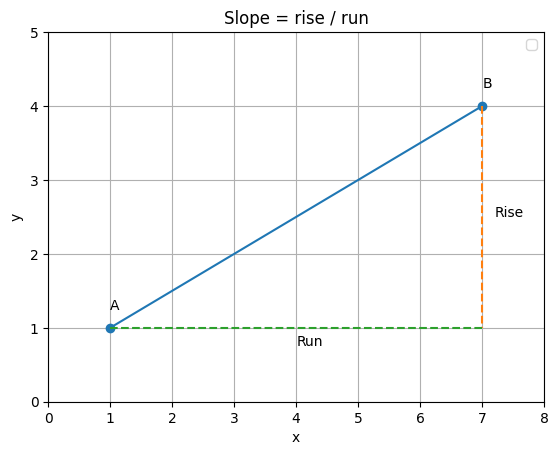

In [9]:
#Punto A y B para la recta
punto_a = np.array([1,1])
punto_b = np.array([7,4])
#Pendiente de la recta
m = punto_b - punto_a
#Grafico de las rectas
plt.plot([punto_a[0],punto_b[0]],[punto_a[1],punto_b[1]],'o-',label='_nolegend_')
plt.plot([punto_b[0], 7], [punto_b[1], 1], '--',label='_nolegend_')
plt.plot([punto_a[0], 7], [punto_a[1], 1], '--',label='_nolegend_')
#Limites de los ejes
plt.ylim(0,5)
plt.xlim(0,8)
#Agregar leyendo puntos
plt.annotate('A', [punto_a[0],punto_a[1]+0.25])
plt.annotate('B', [punto_b[0],punto_b[1]+0.25])
#Agregar leyendas de las lineas punteadas
plt.annotate('Rise', [7.2,2.5])
plt.annotate('Run', [4,0.75])
#Agregar fondo cuadriculado
plt.grid()
#Mostrar leyendas y etiquetas de los ejes
plt.legend()
plt.title('Slope = rise / run')
plt.xlabel('x')
plt.ylabel('y')


<h2><font color="blue">Ejercicio 7</font></h2>


Cargue el conjunto de datos del archivo <b>iris.csv</b> que creó y grafique en tres histogramas la distribución de los anchos de sépalos (`sepal_width`) para cada especie de flor. Además, haga una cuarta  gráfica con los tres histogramas solapados.


<b>Figura de referencia:</b>

<div style="width:680px;margin-left: auto;margin-right: auto;">
  <img src="https://drive.google.com/uc?id=1mT_PNPqugXDyJSkNoIb1O3FxR_NzY9j7">
</div>

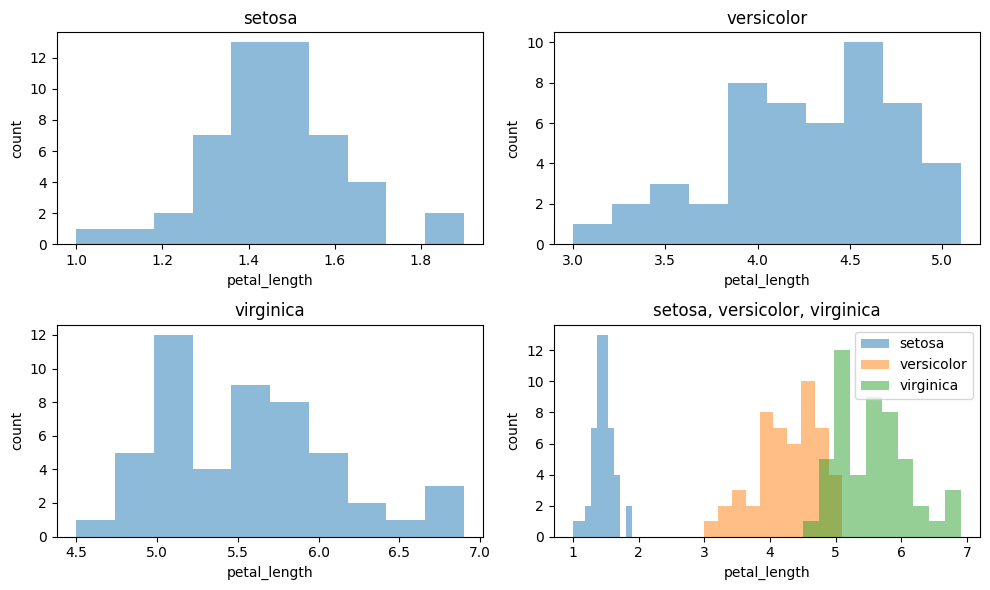

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../Tema_0-Introduccion/data/iris.csv')
#Histogramas para cada clase de flor
setosa_data =df[df['class']=='setosa']
vericolor_data =df[df['class']=='versicolor']
virginica_data =df[df['class']=='virginica']
plt.figure(figsize=(10, 6))
#Histograma para setosa
plt.subplot(2,2,1)
plt.hist(setosa_data['petal_length'], bins=10, alpha=0.5, label='setosa')
plt.title('setosa')
plt.xlabel('petal_length')
plt.ylabel('count')
#Histograma para versicolor
plt.subplot(2,2,2)
plt.hist(vericolor_data['petal_length'], bins=10, alpha=0.5, label='versicolor')
plt.title('versicolor')
plt.xlabel('petal_length')
plt.ylabel('count')
#Histograma para virginica
plt.subplot(2,2,3)
plt.hist(virginica_data['petal_length'], bins=10, alpha=0.5, label='virginica')
plt.title('virginica')
plt.xlabel('petal_length')
plt.ylabel('count')
#Histograma para todas las clases
plt.subplot(2,2,4)
plt.hist(setosa_data['petal_length'], bins=10, alpha=0.5, label='setosa')
plt.hist(vericolor_data['petal_length'], bins=10, alpha=0.5, label='versicolor')
plt.hist(virginica_data['petal_length'], bins=10, alpha=0.5, label='virginica')
plt.title('setosa, versicolor, virginica')
plt.xlabel('petal_length')
plt.ylabel('count')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


<h2><font color="blue">Ejercicio 8</font></h2>
    
Cargue en un `DataFrame` el conjunto de datos sobre películas dado en **imdb_1000.csv**. A partir de procesar estos datos responda a los siguientes enunciados.



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df =pd.read_csv('../Tema_0-Introduccion/data/imdb_1000.csv')



    
**1.** Calcule la duración media de las películas


In [12]:
durac_media=df['duration'].mean()
durac_media

120.97957099080695

**2.** Encuentre las 5 películas más cortas y las 3 más largas. Muestre como resultado título y duración de cada lista.


In [13]:
# Encontrar las 5 películas más cortas
peliculas_mas_cortas = df.sort_values('duration').head(5)[['title', 'duration']]

# Encontrar las 3 películas más largas
peliculas_mas_largas = df.sort_values('duration', ascending=False).head(3)[['title', 'duration']]

print("Las 5 películas más cortas:")
print(peliculas_mas_cortas)

print("\nLas 3 películas más largas:")
print(peliculas_mas_largas)

Las 5 películas más cortas:
                           title  duration
389                       Freaks        64
338          Battleship Potemkin        66
258  The Cabinet of Dr. Caligari        67
293                    Duck Soup        68
88                       The Kid        68

Las 3 películas más largas:
                           title  duration
476                       Hamlet       242
157           Gone with the Wind       238
78   Once Upon a Time in America       229



**3.** Grafique con boxplots la duración de las películas, separándolas por género.



<Axes: xlabel='genre', ylabel='duration'>

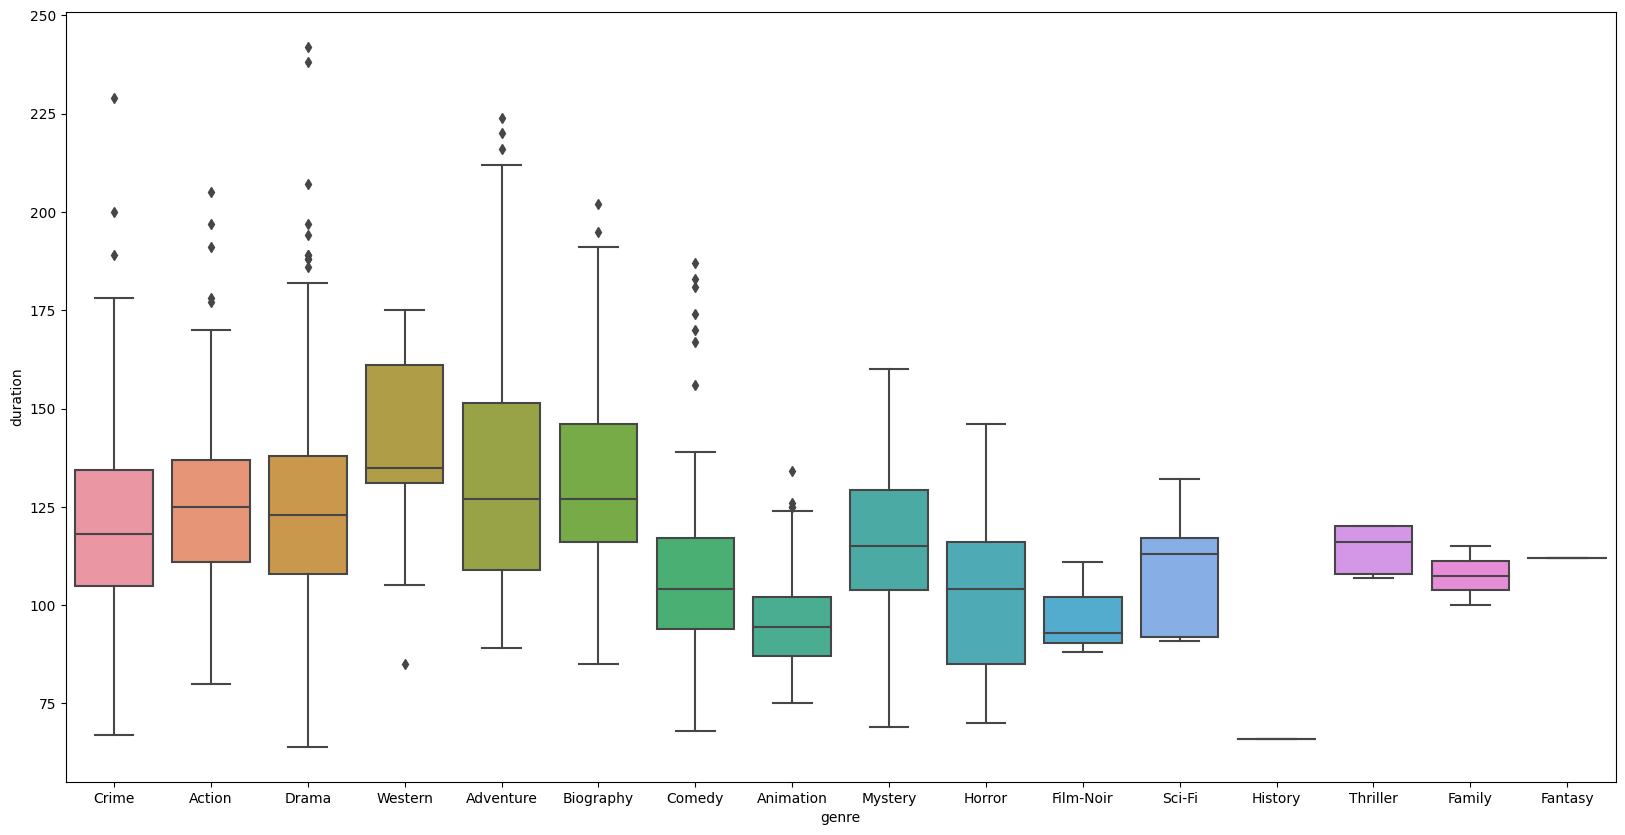

In [14]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.boxplot(data=df, x='genre', y='duration', ax=axes)

**4.** Grafique con barras la cantidad de películas, separándolas por clasificación de contenido.



<Axes: title={'center': 'Grafico de barras'}, xlabel='Cantidad', ylabel='Clasificacion'>

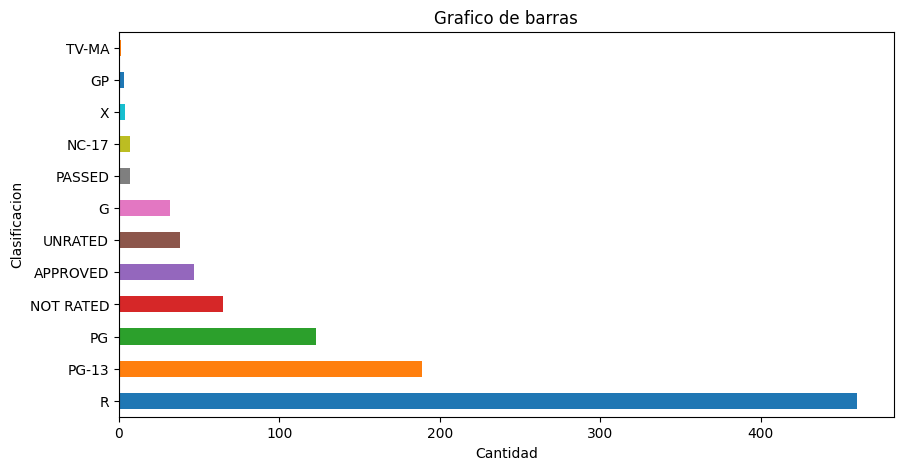

In [15]:
pelis = df['content_rating'].value_counts()
colors = sns.color_palette(None, len(pelis))
pelis.plot(kind='barh', figsize=(10,5), color=colors, xlabel='Cantidad', ylabel='Clasificacion',title='Grafico de barras')

**5.** Encuentre la película con mayor puntaje para cada género y muestre en un `DataFrame` el resultado. Indique género, título y puntaje.

In [16]:
#Pelicula con mayor puntaje por genero y titulo
mayor_puntaje_por_genero_y_titulo = df.groupby(['genre','title'])['star_rating'].max()
#Mostrar pelicula con mayor puntaje por genero en un data frame
mayor_puntaje_por_genero = pd.DataFrame(mayor_puntaje_por_genero_y_titulo)
mayor_puntaje_por_genero.sort_values(by=['star_rating'], inplace=True ,ascending=False)
mayor_puntaje_por_genero




star_rating
genre     title                                
Crime     The Shawshank Redemption          9.3
          The Godfather                     9.2
          The Godfather: Part II            9.1
Action    The Dark Knight                   9.0
Drama     Fight Club                        8.9
...                                         ...
Adventure Labyrinth                         7.4
Drama     Sleepy Hollow                     7.4
          Eraserhead                        7.4
          Far from Heaven                   7.4
Comedy    Deconstructing Harry              7.4

[976 rows x 1 columns]